In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load and Explore the Dataset
# Load the dataset from the CSV file
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Display basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

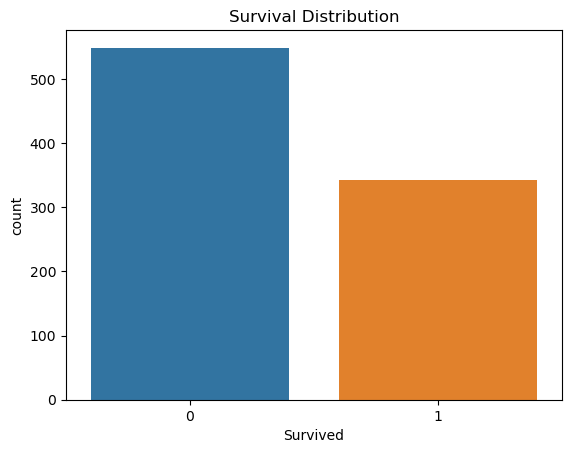

In [6]:
#Perform Exploratory Data Analysis (EDA)
# Plot the distribution of the 'Survived' column
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()




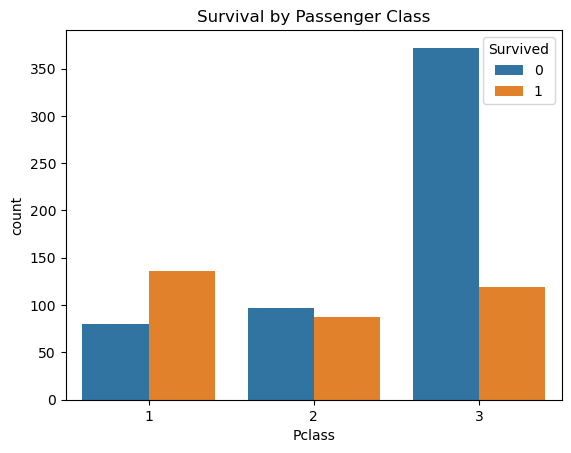

In [8]:
# Plot the distribution of 'Pclass'
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()



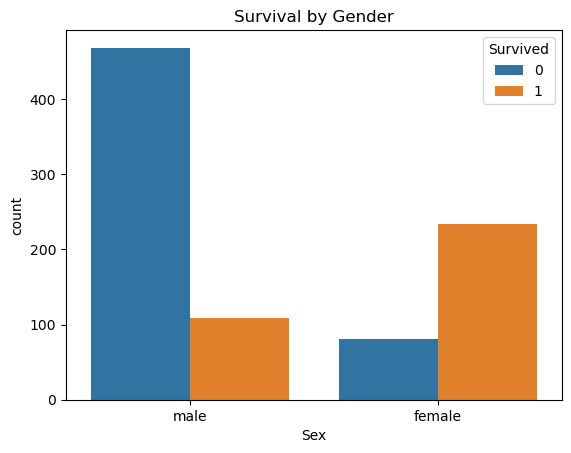

In [9]:
# Plot the distribution of 'Sex'
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('Survival by Gender')
plt.show()



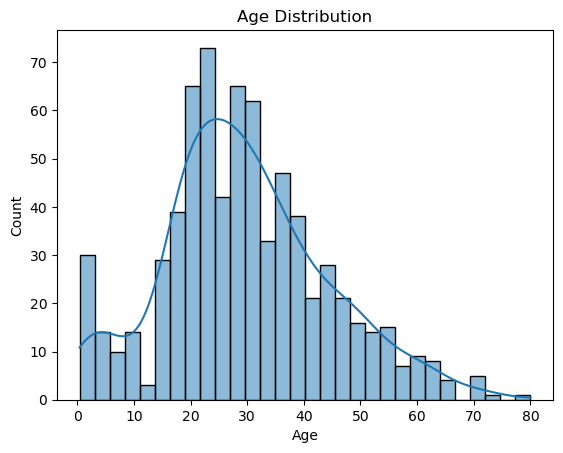

In [10]:
# Age distribution plot
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()



C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


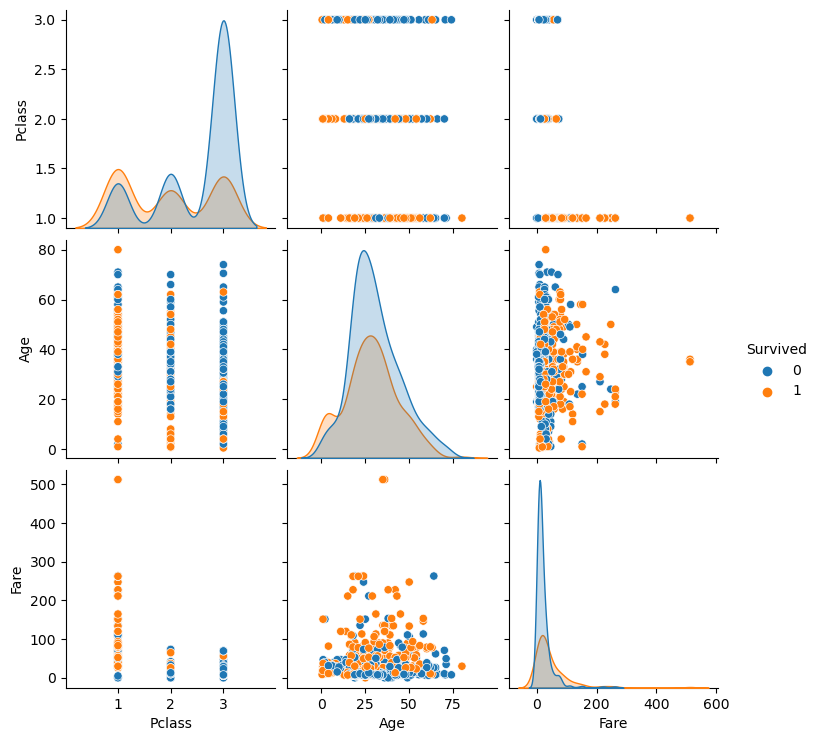

In [12]:
# Pairplot to see the relationships between features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

In [23]:
# Columns that you want to drop
columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']

# Check if each column exists in the DataFrame before dropping it
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(existing_columns_to_drop, axis=1, inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Display the preprocessed data
print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.565736      1      0 -0.502445         2
1         1       1    0  0.663861      1      0  0.786845         0
2         1       3    0 -0.258337      0      0 -0.488854         2
3         1       1    0  0.433312      1      0  0.420730         2
4         0       3    1  0.433312      0      0 -0.486337         2


In [18]:
#Split the Data into Training and Testing Sets
# Define the feature matrix X and target vector y
X = df.drop(['Survived'], axis=1)  # Features
y = df['Survived']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to confirm the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(712, 7) (179, 7) (712,) (179,)


In [20]:
#Train the Model
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



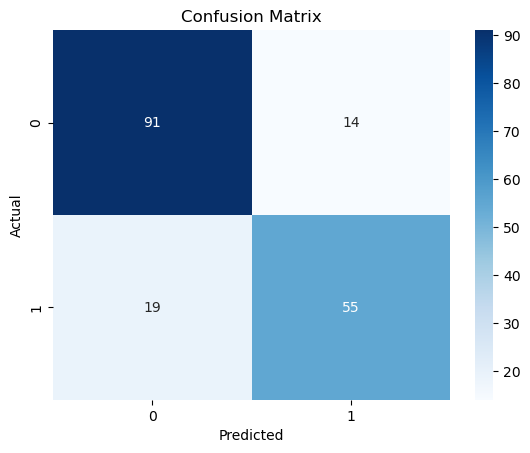

In [21]:
#Evaluate the Mode
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


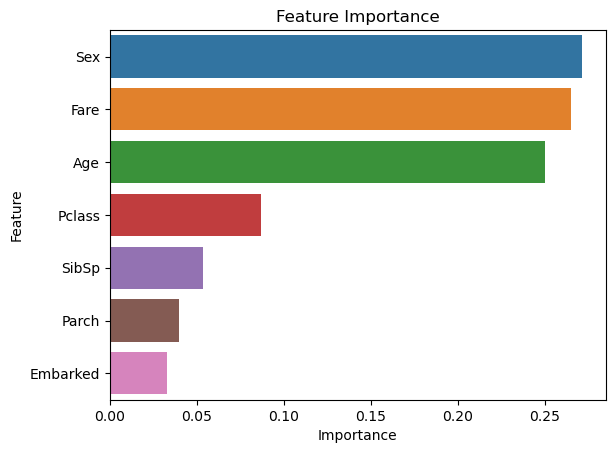

In [22]:
#Interpret the Results
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
